# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

607

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
# Set base url, units variable, and base query url
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_base = f"{url}appid={weather_api_key}&units={units}&q="

# Create lists for each measurement
city_name = []
latitude = []
longitude = []
max_temp = []
humidity = []
cloudiness = []
wind_speed = []
country = []
date = []

In [7]:
city_n = 1

print( f'Beginning Data Retrieval \n-----------------------------')

# Loop through cities
for city in cities:
    
    # Get response from OpenWeather API
    response_json = requests.get(query_base + city).json()
    
    # Append measurements to the prepared lists & print message 
    try:
        
        name = response_json[ 'name']
        city_name.append( name)
        
        lat = response_json[ 'coord'][ 'lat']
        latitude.append( lat)

        lng = response_json[ 'coord'][ 'lon']
        longitude.append( lng)

        temp = response_json[ 'main'][ 'temp']
        max_temp.append( temp)

        hum = response_json[ 'main'][ 'humidity']
        humidity.append( hum)

        clouds = response_json[ 'clouds'][ 'all']
        cloudiness.append( clouds)

        wind = response_json[ 'wind'][ 'speed']
        wind_speed.append( wind)
        
        country_name = response_json[ 'sys'][ 'country']
        country.append( country_name)

        date_n = response_json[ 'dt']
        date.append( date_n)

    
        print( f'City {city_n}: {city}')
        
        city_n = city_n + 1
    
    # Print error message and move on to the next city if there is an error
    except:
        
        print( 'City not found. Skipping...')
      
print( f'----------------------------- \nData Retrieval Complete \n-----------------------------')

Beginning Data Retrieval 
-----------------------------
City 1: folkestone
City 2: punta arenas
City 3: buraydah
City not found. Skipping...
City 4: lagoa
City 5: tabuk
City 6: hilo
City 7: jamestown
City 8: port alfred
City 9: ewa beach
City 10: port keats
City 11: nanortalik
City 12: ilulissat
City 13: bhadrachalam
City 14: rikitea
City 15: bengkulu
City 16: yellowknife
City 17: atuona
City 18: bluff
City 19: kandi
City 20: new norfolk
City 21: port macquarie
City 22: bilma
City 23: umarizal
City 24: sao filipe
City 25: tasiilaq
City 26: rochegda
City 27: port blair
City 28: mananjary
City 29: ushuaia
City 30: russkaya polyana
City not found. Skipping...
City 31: carnarvon
City 32: hermanus
City not found. Skipping...
City 33: bethel
City 34: victoria
City 35: champerico
City 36: leshukonskoye
City 37: mikkeli
City 38: lincoln
City 39: chokurdakh
City 40: albany
City 41: dubbo
City 42: sinnamary
City 43: san andres
City 44: tiksi
City 45: busselton
City not found. Skipping...
City 46

City 382: charyshskoye
City 383: feijo
City 384: egvekinot
City 385: kita
City 386: stornoway
City 387: otukpo
City 388: otjiwarongo
City 389: tarauaca
City 390: evensk
City 391: copiapo
City 392: yingkou
City 393: linxia
City 394: senno
City 395: kamennogorsk
City 396: bulungu
City 397: paamiut
City 398: novopskov
City 399: loano
City 400: omsukchan
City 401: batangafo
City 402: romodanovo
City 403: panevezys
City 404: amurzet
City 405: kollam
City 406: sisimiut
City 407: honiara
City 408: san felipe
City 409: ogulin
City 410: hamilton
City 411: grindavik
City not found. Skipping...
City 412: igrim
City 413: barabai
City 414: meulaboh
City 415: ahipara
City 416: trat
City 417: walvis bay
City 418: fort nelson
City 419: muros
City 420: makat
City 421: kumeny
City 422: shahreza
City 423: tarko-sale
City 424: suntar
City 425: kirgiz-miyaki
City 426: lahaina
City 427: nyurba
City 428: sioux lookout
City 429: iwaki
City 430: bathsheba
City not found. Skipping...
City not found. Skipping...

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [59]:
# Convert lists into a DataFrame
weather_df = pd.DataFrame({
    'City': city_name,
    'Lat': latitude,
    'Lng': longitude,
    'Max Temp': max_temp,
    'Humidity': humidity,
    'Cloudiness': cloudiness,
    'Wind Speed': wind_speed,
    'Country': country,
    'Date': date
})

# Save to .csv file
weather_df.to_csv("../output_data/cities.csv", index = False)

# Display the DataFrame
weather_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Folkestone,51.0833,1.1833,43.38,70,75,18.41,GB,1619072137
1,Punta Arenas,-53.1500,-70.9167,41.00,87,90,8.05,CL,1619071844
2,Buraidah,26.3260,43.9750,86.00,25,0,3.44,SA,1619072137
3,Lagoa,39.0500,-27.9833,59.81,91,57,31.03,PT,1619072138
4,Tabuk,17.4189,121.4443,86.67,58,100,10.87,PH,1619072138


In [60]:
# Obtain summary statistics on DataFrame
weather_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,561.000000,561.000000,561.000000,561.000000,561.000000,561.000000,5.610000e+02
mean,21.222114,13.942660,59.637950,68.117647,54.431373,8.273743,1.619072e+09
std,33.334933,91.298078,20.721398,23.224227,37.670318,5.747966,9.016665e+01
min,-54.800000,-179.166700,6.800000,8.000000,0.000000,0.670000,1.619072e+09
25%,-6.884400,-67.516700,42.010000,55.000000,19.000000,4.050000,1.619072e+09
50%,26.100000,19.962000,62.600000,73.000000,66.000000,6.870000,1.619072e+09
75%,49.417000,96.128500,76.600000,87.000000,90.000000,11.500000,1.619072e+09
max,78.218600,179.316700,101.730000,100.000000,100.000000,34.990000,1.619072e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [61]:
#  Get the indices of cities that have humidity over 100%.
# No cities with humidity > 100%


In [62]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

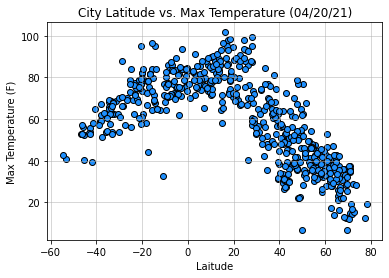

<Figure size 432x288 with 0 Axes>

In [63]:
plt.scatter( weather_df[ 'Lat'], weather_df[ 'Max Temp'], facecolor= 'dodgerblue', edgecolor= 'k')

# Set title and labels
plt.title( 'City Latitude vs. Max Temperature (04/20/21)')
plt.xlabel( 'Laitude')
plt.ylabel( 'Max Temperature (F)')

# Set grid line
plt.grid( linestyle= '-', linewidth= 1, alpha= 0.5)

# Save .png of plot and show output
plt.savefig( '../output_data/Fig1.png')
plt.show()

Maximum temperatures tend to be highest just north of the equator this time of year. The trend is for cooler temperatures the closer the location is to the poles.

## Latitude vs. Humidity Plot

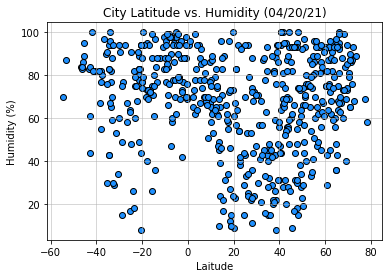

In [70]:
plt.scatter( weather_df[ 'Lat'], weather_df[ 'Humidity'], facecolor= 'dodgerblue', edgecolor= 'k')

# Set title and labels
plt.title( 'City Latitude vs. Humidity (04/20/21)')
plt.xlabel( 'Laitude')
plt.ylabel( 'Humidity (%)')

# Set grid line
plt.grid( linestyle= '-', linewidth= 1, alpha= 0.5)

# Save .png of plot and show output
plt.savefig( '../output_data/Fig2.png')
plt.show()

Humidity is fairly widely dispersed across different latitutes; however, the concentration of low humidity locations is higher in the northern hemisphere.

## Latitude vs. Cloudiness Plot

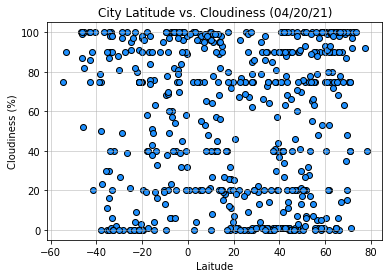

In [71]:
plt.scatter( weather_df[ 'Lat'], weather_df[ 'Cloudiness'], facecolor= 'dodgerblue', edgecolor= 'k')

# Set title and labels
plt.title( 'City Latitude vs. Cloudiness (04/20/21)')
plt.xlabel( 'Laitude')
plt.ylabel( 'Cloudiness (%)')

# Set grid line
plt.grid( linestyle= '-', linewidth= 1, alpha= 0.5)

# Save .png of plot and show output
plt.savefig( '../output_data/Fig3.png')
plt.show()

Cloudiness appears to be widely dispersed across latitudes.

## Latitude vs. Wind Speed Plot

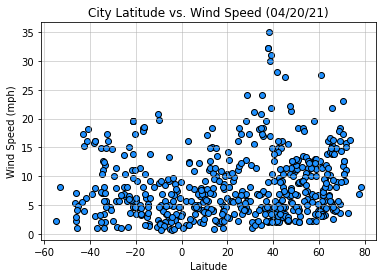

In [72]:
plt.scatter( weather_df[ 'Lat'], weather_df[ 'Wind Speed'], facecolor= 'dodgerblue', edgecolor= 'k')

# Set title and labels
plt.title( 'City Latitude vs. Wind Speed (04/20/21)')
plt.xlabel( 'Laitude')
plt.ylabel( 'Wind Speed (mph)')

# Set grid line
plt.grid( linestyle= '-', linewidth= 1, alpha= 0.5)

# Save .png of plot and show output
plt.savefig( '../output_data/Fig4.png')
plt.show()

Wind speed also appears to be widely dispersed across latitudes, but with a majority of locations experiencing wind speeds of less than 15 mph.

## Linear Regression

In [67]:
# Define scatter plot function
def scatter_plot( x_values, y_values, x_label, y_label, title, regress):
    
    plt.scatter( x_values, y_values)
        
    (slope, intercept, rvalue, pvalue, stderr) = linregress( x_values, y_values)

    # Write out information for annotation
    regression = x_values * slope + intercept
    equation = f'y = { slope:,.2f}x + { intercept:,.2f}'
    r_sq = f'r-squared = { rvalue:,.2f}'
    plt.plot( x_values, regression, 'r-')
       
    # Indicate annotation position on chart
    x_placement = round(np.percentile( x_values, 10), 0)
    y_placement = round(np.percentile( regression, 0), 0)
    
    # Annotate chart
    plt.annotate( equation, ( x_placement, y_placement), fontsize= 15, color= 'r')
    plt.annotate( r_sq, ( x_placement, y_placement - 6), fontsize= 15, color= 'r')
    
    # Add title and labels
    plt.title( title)
    plt.xlabel( x_label)
    plt.ylabel (y_label)
        
    # Save plot images to the Output Data folder
    plt.savefig( f'../output_data/{region}-{measure}.png')
    plt.show()

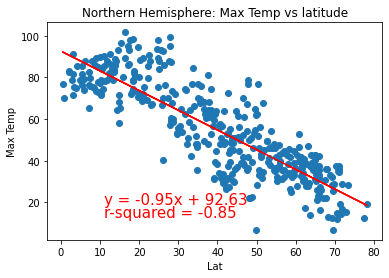

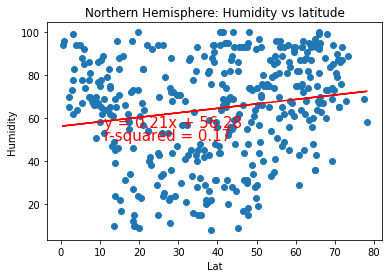

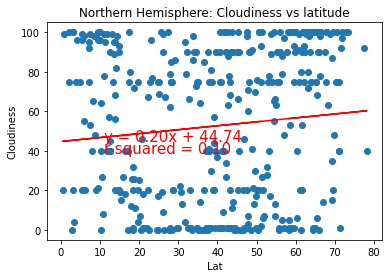

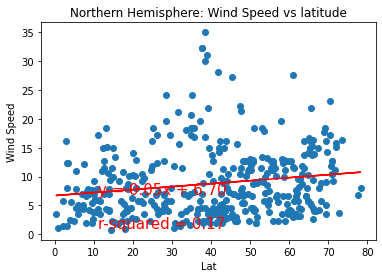

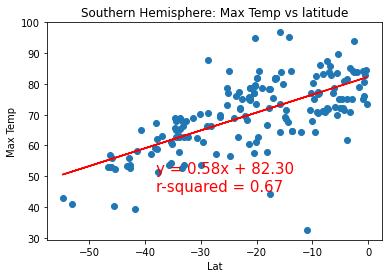

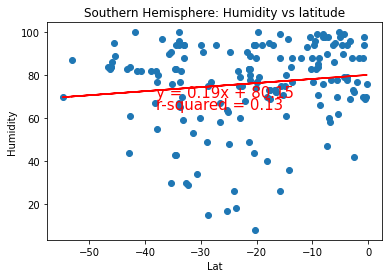

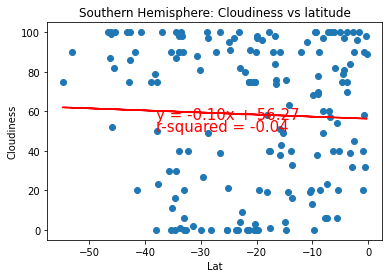

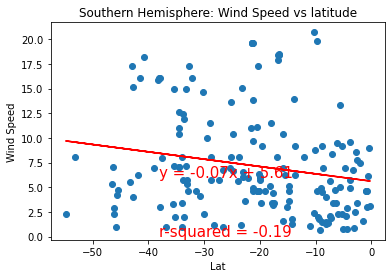

In [68]:
n_hemisphere = weather_df[ weather_df[ 'Lat'] >= 0]
s_hemisphere = weather_df[ weather_df[ 'Lat'] < 0]

regions = [ 'Northern Hemisphere', 'Southern Hemisphere']
measure_vs_lat = [ 'Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed']

for region in regions:
    for measure in measure_vs_lat:
        if region == 'Northern Hemisphere':
            data = n_hemisphere
        elif region == 'Southern Hemisphere':
            data = s_hemisphere
        x_values = data[ 'Lat']
        y_values = data[ measure]
        x_label = 'Lat'
        y_label = measure
        title = f'{region}: {measure} vs latitude'
        scatter_plot( x_values, y_values, x_label, y_label, title, regress)